In [3]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
img = cv2.imread('./dataset/sebastian_vettel/0.jpg')
img.shape

(394, 700, 3)

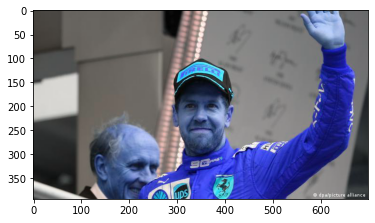

In [5]:
plt.imshow(img)

In [6]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(394, 700)

In [7]:
gray

array([[ 67,  67,  67, ..., 105, 105, 105],
       [ 67,  67,  67, ..., 105, 105, 105],
       [ 67,  67,  67, ..., 105, 105, 105],
       ...,
       [ 65,  67,  71, ...,  46,  46,  46],
       [ 61,  63,  65, ...,  47,  46,  45],
       [ 51,  53,  56, ...,  47,  46,  45]], dtype=uint8)

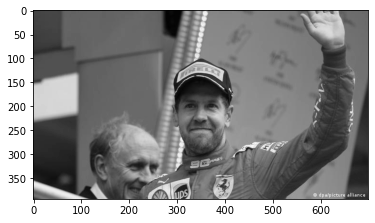

In [8]:
plt.imshow(gray, cmap='gray')

Code used from OpenCV docs and Github

In [9]:
face_cascade = cv2.CascadeClassifier('./opencv-master/data/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv-master/data/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[291, 158, 121, 121]])

In [10]:
(x,y,w,h) = faces[0]
x,y,w,h

(291, 158, 121, 121)

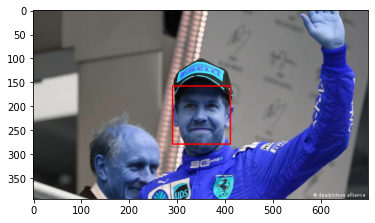

In [11]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

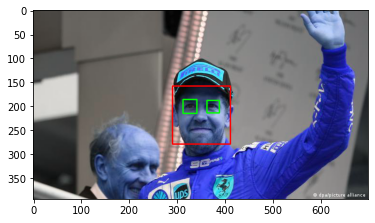

In [12]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w] #roi = region of interest
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        
plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

Function to do above face spotting for multiple images

In [13]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color


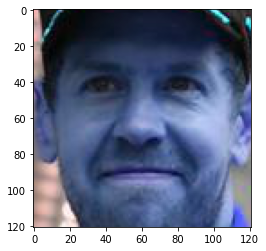

In [14]:
cropped_image = get_cropped_image_if_2_eyes('./dataset/sebastian_vettel/0.jpg')
plt.imshow(cropped_image)

In [84]:
cropped_image = get_cropped_image_if_2_eyes('./dataset/sebastian_vettel/58.jpg')
cropped_image

In [22]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [28]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [29]:
img_dirs

['./dataset/charles_lecrec',
 './dataset/daniel_ricciardo',
 './dataset/george_russel',
 './dataset/max_verstappen',
 './dataset/sebastian_vettel']

In [24]:
'''import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)'''

In [30]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    #print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        #print(entry.path)
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print(f"Generating cropped images in {cropped_folder}.")
            
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            
            cv2.imwrite(cropped_file_path,roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count = count + 1
        

Generating cropped images in ./dataset/cropped/charles_lecrec.
Generating cropped images in ./dataset/cropped/daniel_ricciardo.
Generating cropped images in ./dataset/cropped/george_russel.
Generating cropped images in ./dataset/cropped/max_verstappen.
Generating cropped images in ./dataset/cropped/sebastian_vettel.


#### Using Wavelet transform for Feature Extraction
Various facial features are extracted as edges 

##### Wavelet Transform

In [20]:
# source: stackoverflow
import numpy as np
import pywt
import cv2

def w2d(img, mode='haar', level=1):
    imArray = img
    # Datatype conversion - Converting to grayscale
    imArray = cv2.cvtColor(imArray, cv2.COLOR_RGB2GRAY)
    # Converting to float because now it is in dtype=uint8
    imArray = np.float32(imArray)
    imArray /= 255; # normalizing
    
    # computing coefficients
    # 2D multilevel decomposition using wavedec2
    coeffs = pywt.wavedec2(imArray, mode, level=level)
    
    # processing coefficients
    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H  

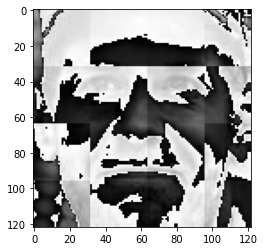

In [21]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

Updating directory info after manually deleting incorrect images

In [40]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'charles_lecrec': ['./dataset/cropped/charles_lecrec\\charles_lecrec1.png',
  './dataset/cropped/charles_lecrec\\charles_lecrec10.png',
  './dataset/cropped/charles_lecrec\\charles_lecrec11.png',
  './dataset/cropped/charles_lecrec\\charles_lecrec12.png',
  './dataset/cropped/charles_lecrec\\charles_lecrec13.png',
  './dataset/cropped/charles_lecrec\\charles_lecrec14.png',
  './dataset/cropped/charles_lecrec\\charles_lecrec15.png',
  './dataset/cropped/charles_lecrec\\charles_lecrec16.png',
  './dataset/cropped/charles_lecrec\\charles_lecrec17.png',
  './dataset/cropped/charles_lecrec\\charles_lecrec18.png',
  './dataset/cropped/charles_lecrec\\charles_lecrec19.png',
  './dataset/cropped/charles_lecrec\\charles_lecrec2.png',
  './dataset/cropped/charles_lecrec\\charles_lecrec21.png',
  './dataset/cropped/charles_lecrec\\charles_lecrec22.png',
  './dataset/cropped/charles_lecrec\\charles_lecrec23.png',
  './dataset/cropped/charles_lecrec\\charles_lecrec24.png',
  './dataset/cropped/cha

In [31]:
# assigning numerical values to celebrity names

class_dict = dict()
cnt = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = cnt
    cnt+=1
class_dict    

{'charles_lecrec': 0,
 'daniel_ricciardo': 1,
 'george_russel': 2,
 'max_verstappen': 3,
 'sebastian_vettel': 4}

In [41]:
X, Y = list(), list()


for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scaled_raw_img = cv2.resize(img, (32,32))
        img_har = w2d(img, 'db1', 5)
        scaled_img_har = cv2.resize(img_har, (32,32))
        stacked_img = np.vstack((scaled_raw_img.reshape(32*32*3,1),scaled_img_har.reshape(32*32,1)))
        combined_img = stacked_img
        
        X.append(combined_img)
        Y.append(class_dict[celebrity_name])
        

In [42]:
len(X[0])

4096

In [37]:
X[0]

array([[ 33],
       [ 35],
       [ 45],
       ...,
       [223],
       [226],
       [225]], dtype=uint8)

In [43]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(145, 4096)

### Model Training

SVM with rbf kernel tuned with heuristic fine tuning

In [46]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0)

# building sklearn pipeline 
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 3))]) # C = 1 gives 60% accuracy, 2 onwards 75%
pipe.fit(X_train, Y_train)
pipe.score(X_test, Y_test)

0.7567567567567568

In [60]:
len(X_test)

37

In [61]:
print(classification_report(Y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.67      0.75      0.71         8
           1       0.86      0.86      0.86         7
           2       0.80      0.89      0.84         9
           3       0.75      0.50      0.60         6
           4       0.71      0.71      0.71         7

    accuracy                           0.76        37
   macro avg       0.76      0.74      0.74        37
weighted avg       0.76      0.76      0.75        37



To find Best Model and it's parameters; Let's use GridSearchCv

In [62]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [64]:
model_params = {
                'svm':{
                       'model':svm.SVC(gamma = 'auto', probability = True),
                        'params':{
                                  'svc__C':[1,10,100,1000],
                                   'svc__kernel':['rbf','linear']                             
                                  }                    
                       }, 
                'random_forest':{
                                 'model':RandomForestClassifier(),
                                 'params':{
                                           'randomforestclassifier__n_estimators':[1,5,10]                                     
                                           }                    
                                 },
                'logistic_regression':{
                                       'model':LogisticRegression(solver='liblinear',multi_class='auto'),
                                       'params':{
                                                 'logisticregression__C':[1,5,10]
                                                 }                                         
                                       }  
    
                }

In [69]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, Y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.731602,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.409091,{'randomforestclassifier__n_estimators': 5}
2,logistic_regression,0.777922,{'logisticregression__C': 1}


In [70]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=5))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [72]:
best_estimators['svm'].score(X_test,Y_test)

0.7837837837837838

In [73]:
best_estimators['random_forest'].score(X_test,Y_test)

0.32432432432432434

In [75]:
best_estimators['logistic_regression'].score(X_test,Y_test)

0.7837837837837838

In [76]:
best_clf = best_estimators['svm']

In [78]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, best_clf.predict(X_test))
cm

array([[6, 0, 1, 0, 1],
       [1, 6, 0, 0, 0],
       [0, 1, 8, 0, 0],
       [1, 0, 0, 5, 0],
       [0, 1, 0, 2, 4]], dtype=int64)

Text(69.0, 0.5, 'Truth')

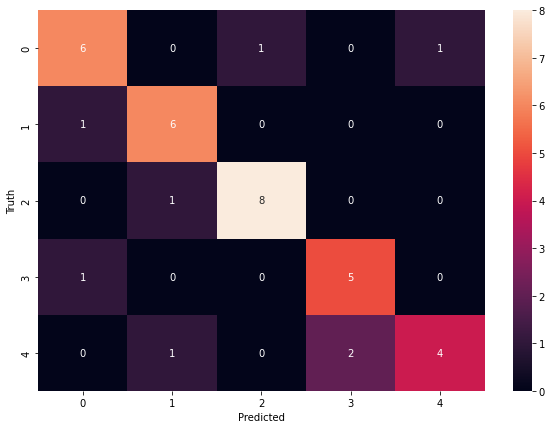

In [79]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [80]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

In [81]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))